In [70]:
import tensorflow as tf
import json
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [71]:
classes = ["0","1","2","3","4","5","6"]
class_names = ["angry","disgust","fear","happy","neutral","sad","surprised"]

# load the motel to train it again

In [4]:
model = tf.keras.models.load_model('models&Historys/model/CNN_55EPOCHS_ACC8633_model.h5')

2022-05-10 11:28:35.769376: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 11:28:35.769590: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


# load all saved Model Historys to trac the Accuracy and  Loss trends
### we have to load every history alone because using a "for loop" givs a wrong order

In [57]:
history1 = json.load(open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/historys/history1", 'r'))
history2 = json.load(open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/historys/history2", 'r'))
history3 = json.load(open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/historys/history3", 'r'))
history4 = json.load(open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/historys/history4", 'r'))
history5 = json.load(open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/historys/history5", 'r'))

# Gather all history Acc and Loss in a total variable to plot the whole trend in one image

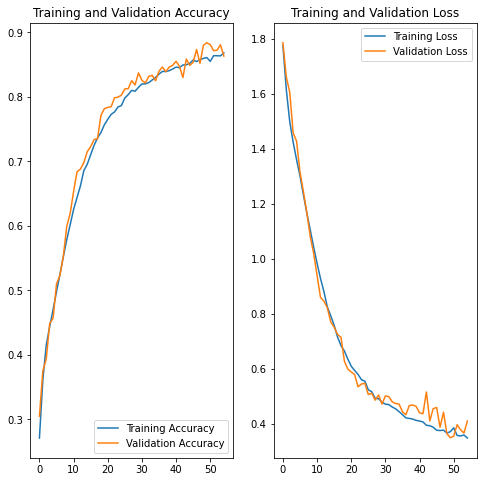

In [66]:
total_history = [history1 ,history2 , history3 , history4 , history5] # aus jedem History element werden acc und loss aufsummiert

acc=[]
val_acc = []
loss = []
val_loss = []

for history in total_history :
    acc = acc +  history['accuracy']
    val_acc = val_acc + history['val_accuracy']
    loss = loss + history['loss']
    val_loss = val_loss + history['val_loss']

epochs_range = range(55)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# train the model for further 10 epochs and save the history in "history6"

In [63]:
train_dir = "src/train"
val_dir = "src/train_smal"


BATCH_SZIZE = 128
IMG_SIZE = (160, 160)


train_images = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )


test_images = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                          shuffle=True,
                                                          batch_size=BATCH_SZIZE,
                                                          image_size=IMG_SIZE
                                                          )



history6 = model.fit(train_images, epochs=10,
                     validation_data=test_images)

Found 28709 files belonging to 7 classes.
Found 6459 files belonging to 7 classes.
Epoch 1/10


/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-05-10 12:04:04.198427: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-10 12:04:04.199037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - ETA: 0s - loss: 0.4625 - accuracy: 0.8303

2022-05-10 12:06:51.096345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 176s 774ms/step - loss: 0.4625 - accuracy: 0.8303 - val_loss: 0.2382 - val_accuracy: 0.9198
Epoch 2/10
225/225 [==============================] - 178s 789ms/step - loss: 0.4095 - accuracy: 0.8465 - val_loss: 0.2106 - val_accuracy: 0.9347
Epoch 3/10
225/225 [==============================] - 193s 859ms/step - loss: 0.3921 - accuracy: 0.8523 - val_loss: 0.2063 - val_accuracy: 0.9337
Epoch 4/10
225/225 [==============================] - 175s 777ms/step - loss: 0.3708 - accuracy: 0.8596 - val_loss: 0.1824 - val_accuracy: 0.9440
Epoch 5/10
225/225 [==============================] - 181s 805ms/step - loss: 0.3638 - accuracy: 0.8616 - val_loss: 0.1889 - val_accuracy: 0.9419
Epoch 6/10
225/225 [==============================] - 181s 804ms/step - loss: 0.3607 - accuracy: 0.8643 - val_loss: 0.1631 - val_accuracy: 0.9478
Epoch 7/10
225/225 [==============================] - 186s 828ms/step - loss: 0.3590 - accuracy: 0.8662 - val_loss: 0.1774 - val_accura

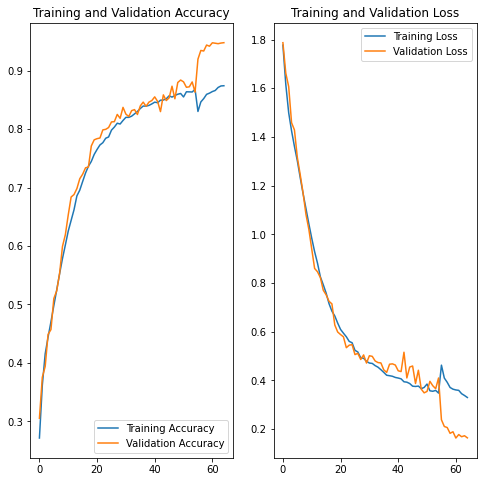

In [68]:
total_history.append(history6.history)
acc=[]
val_acc = []
loss = []
val_loss = []

for history in total_history :
    acc = acc +  history['accuracy']
    val_acc = val_acc + history['val_accuracy']
    loss = loss + history['loss']
    val_loss = val_loss + history['val_loss']

epochs_range = range(65)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Aus irgend einem Grund gibt es einen erstaunlichen Unterschied, wenn man das Model erst loadet und dann weiter trainiert.
# Die Val_Accuracy springt nach oben während die Accuracy der Trainingsdaten ein wening sinkt
# Das gleiche ist bei dem Loss Graph zu sehen

In [74]:
model.save("models&Historys/model/CNN_65EPOCHS_ACC9480" + "_model.h5")
json.dump(history6.history, open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/historys/history6", 'w'))

OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!
